# Predicting Heart Stroke using Logistic Regression

We predicte Heart stroke by using logistic regression. For the same healthcare dataset used which is downloaded from kaggle.

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [88]:
#1.Importing dependencies and Load data
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
# Loading dataset
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#2. Exploratory Data Analysis
# rows and columns

data.shape

(5110, 12)

In [7]:
# Dataset Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Columns 

data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
# Data types

data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# Statistical Analysis

data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
# Null value checking

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# removal of null values

data['bmi']=data['bmi'].fillna(data.bmi.median())

In [15]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [87]:
# Checking of data balance

data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

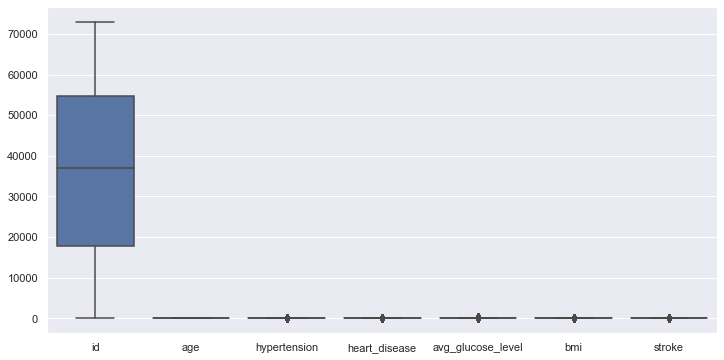

In [17]:
# Outlier detection using boxplot

sns.set(rc={"figure.figsize":(12,6)})
sns.boxplot(data=data)

In [32]:
# Data selection

data1=data.drop(['id','gender','ever_married','work_type'],axis=1)
data1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
1,61.0,0,0,Rural,202.21,28.1,never smoked,1
2,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Urban,83.75,28.1,never smoked,0
5106,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


In [122]:
#Data Encoding 

data1['Residence_type']=data1['Residence_type'].map({'Urban':1,'Rural':0})
data1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,NaN,228.69,36.6,1,1,0,0
1,61.0,0,0,NaN,202.21,28.1,1,0,1,0
2,80.0,0,1,NaN,105.92,32.5,1,0,1,0
3,49.0,0,0,NaN,171.23,34.4,1,0,0,1
4,79.0,1,0,NaN,174.12,24.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,NaN,83.75,28.1,0,0,1,0
5106,81.0,0,0,NaN,125.20,40.0,0,0,1,0
5107,35.0,0,0,NaN,82.99,30.6,0,0,1,0
5108,51.0,0,0,NaN,166.29,25.6,0,1,0,0


In [123]:
data1=pd.get_dummies(data1)
data1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,NaN,228.69,36.6,1,1,0,0
1,61.0,0,0,NaN,202.21,28.1,1,0,1,0
2,80.0,0,1,NaN,105.92,32.5,1,0,1,0
3,49.0,0,0,NaN,171.23,34.4,1,0,0,1
4,79.0,1,0,NaN,174.12,24.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,NaN,83.75,28.1,0,0,1,0
5106,81.0,0,0,NaN,125.20,40.0,0,0,1,0
5107,35.0,0,0,NaN,82.99,30.6,0,0,1,0
5108,51.0,0,0,NaN,166.29,25.6,0,1,0,0


In [37]:
data1=data1.drop('smoking_status_Unknown',axis=1)

In [38]:
data1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,1,0,0
1,61.0,0,0,0,202.21,28.1,1,0,1,0
2,80.0,0,1,0,105.92,32.5,1,0,1,0
3,49.0,0,0,1,171.23,34.4,1,0,0,1
4,79.0,1,0,0,174.12,24.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.1,0,0,1,0
5106,81.0,0,0,1,125.20,40.0,0,0,1,0
5107,35.0,0,0,0,82.99,30.6,0,0,1,0
5108,51.0,0,0,0,166.29,25.6,0,1,0,0


<AxesSubplot:>

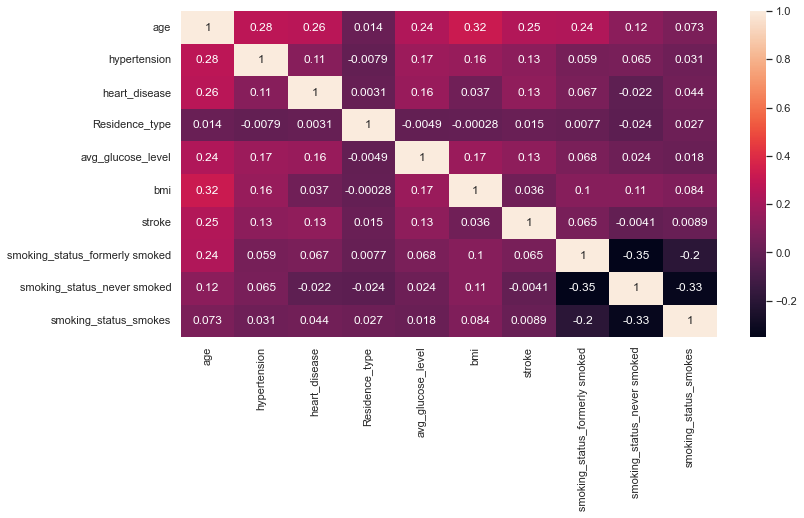

In [39]:
# Correlation between features

sns.heatmap(data1.corr(),annot=True)

In [40]:
#3 Model Creation
# X and y

X=data1.drop(['stroke','smoking_status_never smoked'],axis=1)
y=data1['stroke'].values

In [90]:
# Scaling the data/balancing

rs=RandomOverSampler(sampling_strategy=0.8)
X1,y1=rs.fit_resample(X,y)

In [124]:
# Splitting the dataset

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=2)
print('X_train:',np.shape(X_train))
print('X_test:',np.shape(X_test))
print('y_train:',np.shape(y_train))
print('y_test:',np.shape(y_test))

X_train: (6124, 8)
X_test: (2625, 8)
y_train: (6124,)
y_test: (2625,)


In [126]:
#Standardization

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [127]:
# Model creation

lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [128]:
# 4. Model Evaluation
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[1123,  348],
       [ 239,  915]], dtype=int64)

In [105]:
TP=cm[0][0]
FP=cm[1][0]
FN=cm[0][1]
TN=cm[1][1]
print("TP:",TP)
print("FP:",FP)
print("FN:",FN)
print("TN:",TN)

TP: 1123
FP: 239
FN: 348
TN: 915


In [106]:
# Accuracy,Precision,Recall,F1-score

P=TP/(TP+FP)
R=TP/(TP+FN)

print("Accuracy:",(TP+TN)/(TP+TN+FP+FN))
print('Precision:',P)
print('Recall:',R)
print('F1-Score:',2*((P*R)/(P+R)))

Accuracy: 0.7763809523809524
Precision: 0.8245227606461086
Recall: 0.7634262406526172
F1-Score: 0.7927991528415108


In [107]:
# Accuracy_score

ac=accuracy_score(y_test,y_pred)
ac

0.7763809523809524

In [129]:
#Precision Score

pc=precision_score(y_test,y_pred)
pc

0.7244655581947743

In [130]:
#Recall_score

re=recall_score(y_test,y_pred)
re

0.792894280762565

In [131]:
#f1-score

f1=2*((pc*re)/(pc+re))
f1

0.7571369466280513

In [114]:
X_test[0]

array([ 1.15012523, -0.43705415, -0.35446188,  0.966651  , -0.96660334,
        2.36438531, -0.51543205, -0.45180576])

In [120]:
# Checking result

result=model.predict([[1.15012523, -0.43705415, -0.35446188,  0.966651  , -0.96660334,
        2.36438531, -0.51543205, -0.45180576]])
if result[0]==1:
    print("Sorry you have take care...u r strocked")
else:
    print("Good luck...!!")

Sorry you have take care...u r strocked


In [116]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [132]:
# Classification report of selected classification algorithm

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1471
           1       0.72      0.79      0.76      1154

    accuracy                           0.78      2625
   macro avg       0.77      0.78      0.77      2625
weighted avg       0.78      0.78      0.78      2625

